## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoc

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 5s 96us/step - loss: 2.0229 - acc: 0.2774 - val_loss: 1.8706 - val_acc: 0.3390
Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8023 - acc: 0.3655 - val_loss: 1.7688 - val_acc: 0.3726
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7239 - acc: 0.3917 - val_loss: 1.7029 - val_acc: 0.3957
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6713 - acc: 0.4115 - val_loss: 1.6671 - val_acc: 0.4031
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6296 - acc: 0.4235 - val_loss: 1.6144 - val_acc: 0.4231
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5897 - acc: 0.4418 - val_loss: 1.5893 - val_acc: 0.4488
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5601 - acc: 0.4506 - val_loss: 1.5654 - val_acc: 0.4501
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 5s 92us/step - loss: 2.1188 - acc: 0.2531 - val_loss: 2.0747 - val_acc: 0.2768
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0407 - acc: 0.2877 - val_loss: 2.0107 - val_acc: 0.3029
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9861 - acc: 0.3075 - val_loss: 1.9634 - val_acc: 0.3166
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9436 - acc: 0.3214 - val_loss: 1.9281 - val_acc: 0.3260
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9104 - acc: 0.3334 - val_loss: 1.8984 - val_acc: 0.3369
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8845 - acc: 0.3413 - val_loss: 1.8760 - val_acc: 0.3468
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8631 - acc: 0.3482 - val_loss: 1.8572 - val_acc: 0.3513
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2508 - acc: 0.1675 - val_loss: 2.2459 - val_acc: 0.1683
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.2371 - acc: 0.1809 - val_loss: 2.2328 - val_acc: 0.1840
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.2243 - acc: 0.1944 - val_loss: 2.2203 - val_acc: 0.1993
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.2118 - acc: 0.2051 - val_loss: 2.2080 - val_acc: 0.2132
Epoch 8/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1996 - acc: 0.2160 - val_loss: 2.1959 - val_acc: 0.2225
Epoch 9/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1876 - acc: 0.2263 - val_loss: 2.1839 - val_acc: 0.2283
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1760 - acc: 0.2330 - val_loss: 2.1723 - val_acc: 0.2358
Epoch 11/50
50000/50000 [==============

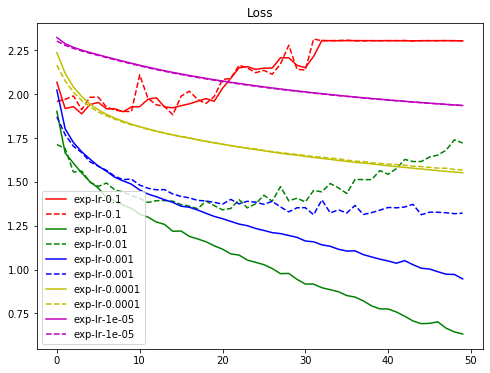

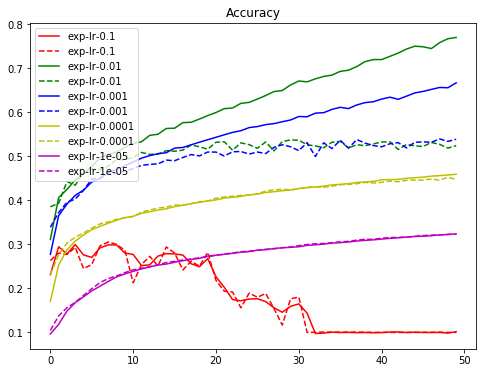

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()